# Logarithms

(adapted from CHEM 1000 - Spring 2023 by Prof. Geoffrey Hutchison, University of Pittsburgh)

Chapter 2 in [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/)

By the end of this session, you should be able to:
- Understand logarithms, including different bases (e.g., $\log_{10}$, $\log_2$, $\log$ / $\ln$)
- Use Sterling's approximation to approximate $N!$ for Boltzmann entropy

## Exponentials and Log

We know the exponential function and $e^x$ - it goes up very fast.

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
# insert any graphs into our notebooks directly
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


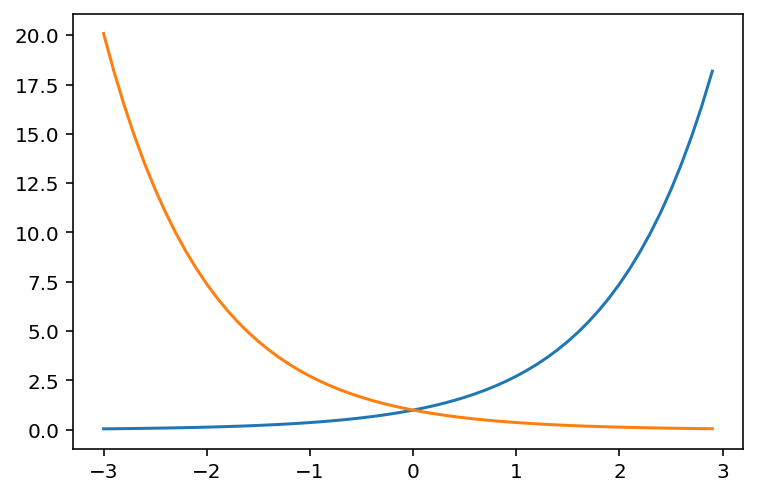

In [3]:
x = np.arange(-3.0, 3.0, 0.1)

plt.plot(x, np.exp(x))
plt.plot(x, np.exp(-x))
plt.show()

We can, of course also plot the natural log - the inverse of $e^x$

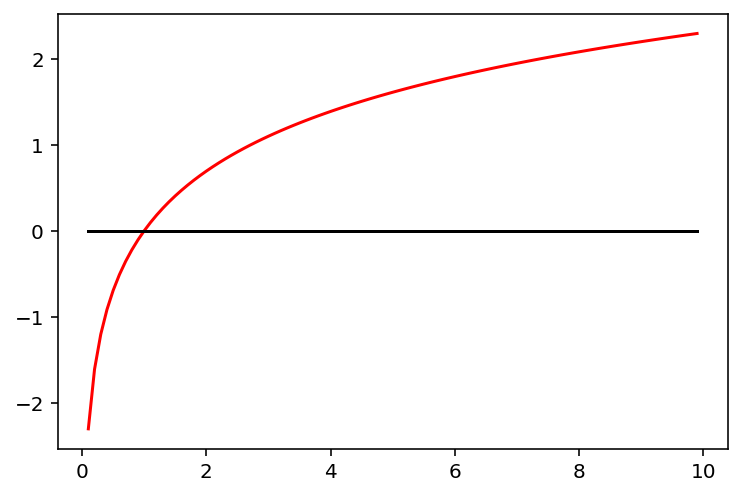

In [4]:
x = np.arange(0.1, 10.0, 0.1)
plt.plot(x, np.log(x), color='red')

plt.plot(x, x*0.0, color='black') # draw a horizontal line at y = 0.0
plt.show()

Of course we can come up with different exponential functions with different base numbers, like $e^x$ and $10^x$ and $2^x$ (which computers use). Similarly, there are multiple log functions. The most common is the natural log, te inverse of $e^x$ which is sometimes indicated with $\ln x$. In Python we just use $\log x = \log_e x$.

But there's also `np.log10(x)` = $\log_{10} x$ and `np.log2(x)` = $\log_2 x$

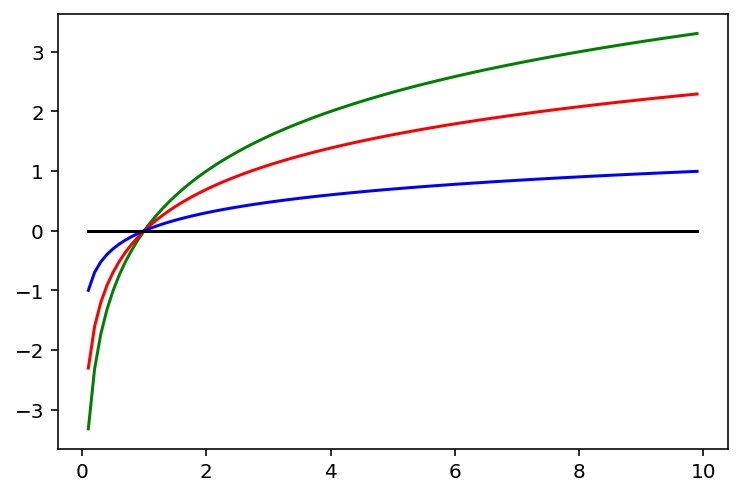

In [5]:
plt.plot(x, np.log2(x), color='green')
plt.plot(x, np.log(x), color='red')
plt.plot(x, np.log10(x), color='blue')
plt.plot(x, x*0.0, color='black') # draw a horizontal line at y = 0.0
plt.show()

Notice that the smallest base (2) goes up faster than `np.log(x)` or `np.log10(x)`.

## Log Arithmetic

Logarithms have some extremely useful properties for simplifying complicated math, which made them critical before the invention of calculators and computers:

**Multiplication** - Taking the log of a product is the same as adding two logarithms:
$$\log (x y)=\log (x)+\log (y)$$

**Division** - Similarly, taking the log of a quotient is the same as subtracting two logarithms:

$$\log (\frac{x}{y})=\log (x) - \log (y)$$

**Powers** - Taking the log of a number to a power is similarly easy:

$$\log x^k = k \log x$$

## Natural Log as Finite Difference

Why is the natural log and $e^x$ so special? After all, $e$ is not an integer, it's an irrational number. We can consider the $\log x$ function by its slope at different points:

$$\text { slope }=\frac{\text { rise }}{\text { run }}=\frac{\Delta \ln (x)}{\Delta x}=\frac{1}{x}$$

Rewriting this a bit, we get:

$$\Delta \ln (x) = \ln(x + \Delta x) - \ln(x) = \frac{\Delta x}{x}$$

So we just need to pick some $\Delta x$ values and go from there:

**Estimating Values of $\ln x$ Using Finite Differences:**
(from Straub, J.E. [Mathematical Methods for Chemists](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/)

$$
\begin{array}{ccccc} \hline  & & {\ln (x)} \\ x & \Delta x=3 & \Delta x=1 & \Delta x=0.5 & \text { exact } \\ \hline 0.0 & & -1.000 & -1.500 & -\infty \\ 0.5 & & & -0.500 & -0.693 \\ 1.0 & 0.000 & 0.000 & 0.000 & 0.000 \\ 1.5 & & & 0.500 & 0.405 \\ 2.0 & & 1.000 & 0.833 & 0.693 \\ 2.5 & & & 1.083 & 0.916 \\ 3.0 & & 1.500 & 1.283 & 1.099 \\ 3.5 & & & 1.450 & 1.253 \\ 4.0 & 3.000 & 1.833 & 1.593 & 1.386 \\ 4.5 & & & 1.718 & 1.504 \\ 5.0 & & 2.083 & 1.829 & 1.609 \\ 5.5 & & & 1.929 & 1.705 \\ 6.0 & & 2.283 & 2.020 & 1.792 \\ 6.5 & & & 2.103 & 1.872 \\ 7.0 & 3.750 & 2.450 & 2.180 & 1.946 \\ 7.5 & & & 2.252 & 2.015 \\ 8.0 & & 2.593 & 2.318 & 2.079 \\ 8.5 & & & 2.381 & 2.140 \\ 9.0 & & 2.718 & 2.440 & 2.197 \\ 9.5 & & & 2.495 & 2.251 \\ 10.0 & 4.179 & 2.829 & 2.548 & 2.303 \\ \hline\end{array}
$$

In [6]:
# finite difference for log(x): Δlog(x) = log(x + Δx) - log(x) = Δx/x
delta_x = 0.5
log = 0.0 # at x = 1 by definition
x = 1.0
total_steps = int(10.0 / delta_x) - 1 # the number of steps from 1 to 10 given delta_x

for step in range(total_steps):
    print(round(x, 2), round(log, 4))
    # get the values for the next step
    log = log + delta_x / x
    x = x + delta_x

1.0 0.0
1.5 0.5
2.0 0.8333
2.5 1.0833
3.0 1.2833
3.5 1.45
4.0 1.5929
4.5 1.7179
5.0 1.829
5.5 1.929
6.0 2.0199
6.5 2.1032
7.0 2.1801
7.5 2.2516
8.0 2.3182
8.5 2.3807
9.0 2.4396
9.5 2.4951
10.0 2.5477


## Applications

Why all the bother with logarithms? We use them frequently in science.

$$\mathrm{pH}=-\log _{10}\left(a_{H^{+}}\right)$$

In other words, an acidic solution $[H^+] = 10^{-1}$ for pH = 1, while a basic solution might have $[H^+] = 10^{-12}$ for pH = 12. We don't talk about it frequently, but that's 12 - 1 = 11 orders of magnitude difference in concentration, only 100,000,000,000. Not many things differ by over 100 billion.

**Length Scales**

An atom is ~1Å in radius, or $10^{-10} m$ and the radius of Earth is $\sim 10^{7} m$, only 17 orders of magnitude. From an atomic nucleus to the size of the known universe is 41 orders of magnitude - literally astronomically large numbers!

## Logarithm and Entropy

Logarithms also have key aspect in entropy. Boltzmann's entropy formula is:

$$ S = k_b \ln W $$

where $k_b$ is the Boltzmann constant and $W$ is the number of possible states. (Incidentally, this formula is [engraved on his grave](https://en.wikipedia.org/wiki/Ludwig_Boltzmann#Second_thermodynamics_law_as_a_law_of_disorder).)

Let's think about this in the context of the entropy of a few books -- let's say three. I can arrange them in $3! = 6$ ways (ABC, CAB, BCA, … etc.). The entropy isn't very large because I don't have so many arrangement states.

Instead, let's consider the number of possible states for a deck of 52 cards: $52!$

In [7]:
n = 52
total = 1
for i in range(1, 52+1): # range will go from start to end-1 and we want 1..52
    total = total * i
print(total)

80658175170943878571660636856403766975289505440883277824000000000000


Wow, that's a big number... 68 digits.. Let's plot a few parts of `n!` maybe to 10! and see how it goes?

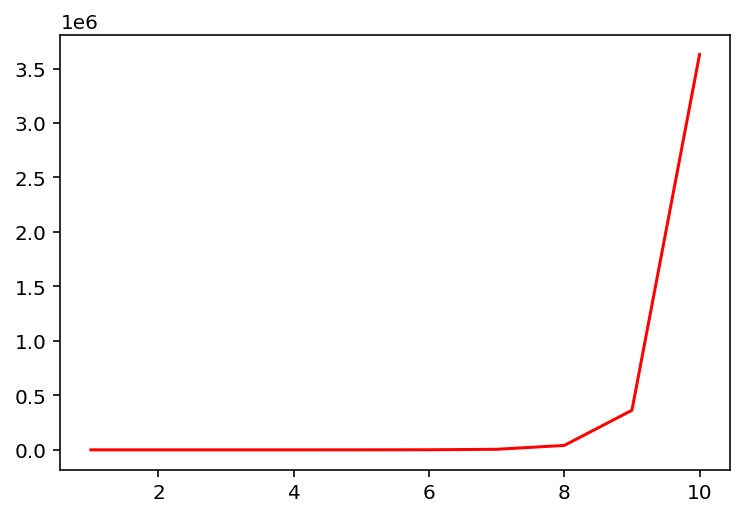

In [8]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [] # start with an empty list
for n in x:
    y.append(math.factorial(n)) # add n! for each item in x

plt.plot(x, y, color='red')
plt.show()

It goes up fast, but a bit hard to understand - just that it goes from under 500k for 9! to over 3.5 million for 10! Let's try using a logarithmic y-axis:

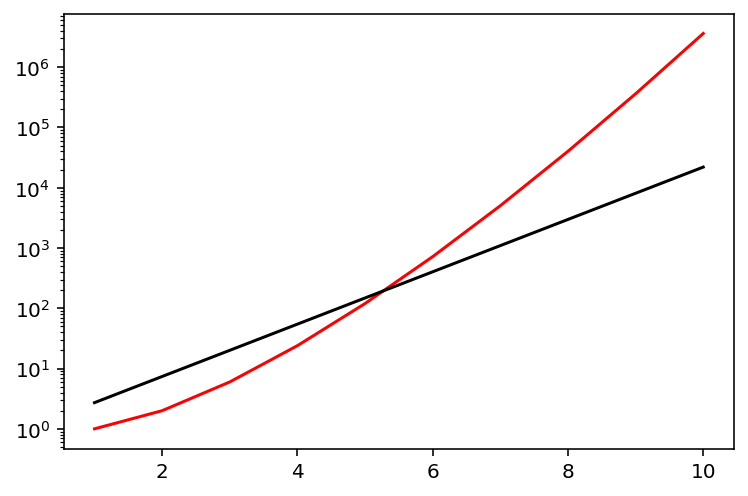

In [9]:
plt.plot(x, y, color='red')
plt.plot(x, np.exp(x), color='black')
plt.yscale('log')
plt.show()

Woah. Factorial starts slow.
- 1! = 1
- 2! = 2
- 3! = 6
- 4! = 24

But then it goes up *faster* than the exponential line in black.
- 5! = 120
- 6! = 720

Clearly having an approximation to $\log N!$ would be useful for entropy. We can use the rules for log arithmetic above:

$$\log N! = \log [ N \times (N-1) \times \cdots \times 2 \times 1] = \log 1 + \log 2 + \cdots \log N$$

$$\ln N !=\sum_{n=1}^{N} \ln (n) $$

If N gets really big, we can approximate by using an integral:

$$\ln N ! \approx \int_{1}^{N} \ln (n) d n=[n \ln n-n]_{1}^{N}=N \ln N-N+1$$

This is known as [Sterling's approximation](https://en.wikipedia.org/wiki/Stirling%27s_approximation), named after James Sterling, although it was first stated by [de Moivre](https://en.wikipedia.org/wiki/Abraham_de_Moivre).

Given Sterling's formula, can we evaluate the entropy for a mole of atoms?

$$
\begin{aligned} \ln \left(6.02 \times 10^{23}\right) & \approx\left(6.02 \times 10^{23}\right) \ln \left(6.02 \times 10^{23}\right)-6.02 \times 10^{23}+1 \\ &=3.30 \times 10^{25}-6.02 \times 10^{23}+1 \\ &=3.24 \times 10^{25} \end{aligned}
$$

In [10]:
# Here's how we definie a new function in Python
def sterling(n):
    n_log_n = n * math.log(n)
    return n_log_n - n + 1  # here's how the function returns a value

def sterling_factorial(n):
    return math.exp(sterling(n))

print('log 5!', sterling(5))
print('5!', sterling_factorial(5))

log 5! 4.047189562170502
5! 57.2363715272943


Remember that 5! is 120, so it's not particularly accurate for small numbers, but it's possible to evaluate $\log(N_a)$

In [11]:
print('log mol!', sterling(6.02e23))

log mol! 3.2360235727706635e+25


There's a slightly more accurate version in the textbook - instead of +1 in the last term:

$$ N ! \approx \sqrt{2 \pi N}(N / e)^{N} $$
$$ \ln N! \approx N \ln N-N + \frac{1}{2} \ln(2\pi N)$$

In [12]:
# new version of our log n! formula
def sterling_v2(n):
    n_log_n = n * math.log(n)
    return n_log_n - n + 0.5 * math.log(2*math.pi * n)

print('log mol!', sterling_v2(6.02e23))

log mol! 3.2360235727706635e+25


That's not a typo, the difference on $6.02 \times 10^{23}$ doesn't even show up to the 16th decimal place.

In [13]:
print('log n!', sterling(5))
print('n!', math.exp(sterling(5)))

print('v2: log n!', sterling_v2(5))
print('v2: n!', math.exp(sterling_v2(5)))

log n! 4.047189562170502
n! 57.2363715272943
v2: log n! 4.7708470515922246
v2: n! 118.01916795759006


It ***definitely*** makes a difference on small numbers though. Remember 5! = 120, so 118 is fairly close.

## Ramanujan's Approximation

Beyond Sterling, [Ramanujan](https://en.wikipedia.org/wiki/Srinivasa_Ramanujan), an Indian mathematician with almost no formal training in mathematics:
> He tried to interest the leading professional mathematicians in his work, but failed for the most part. What he had to show them was too novel, too unfamiliar, and additionally presented in unusual ways; they could not be bothered.

Among many, many other works, we find that Ramanujan also came up with an [approximation for factorials](https://www.johndcook.com/blog/2012/09/25/ramanujans-factorial-approximation/):

$$n ! \sim \sqrt{\pi}\left(\frac{n}{e}\right)^{n} \sqrt[6]{8 n^{3}+4 n^{2}+n+\frac{1}{30}}$$

In [14]:
# implementation of Ramanujan's factorial approximation
# adapted from John Cook: https://www.johndcook.com/blog/2012/09/25/ramanujans-factorial-approximation/
def ramanujan(n):
    fact = math.sqrt(math.pi)*(n/math.e)**n
    fact *= (((8*n + 4)*n + 1)*n + 1/30.)**(1./6.)
    return fact

ramanujan(5)

120.00014706585664

Remember that even the improved form of Sterling's approximation got 118, and the real answer is 120.

On the other hand, it's fairly easy to remember $\ln N! = N \ln N - N + 1$. It's just important to remember that there are often more accurate methods available.

-------
This notebook is adapted from Prof. Geoffrey Hutchison, University of Pittsburgh
https://github.com/ghutchis/chem1000

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>